In [1]:
%matplotlib inline
%config InlineBackend.figure_format='retina'
import numpy as np
import pandas as pd
import prettyplotlib as ppl
from scipy.optimize import curve_fit
from matplotlib import pyplot as plt
from matplotlib import rc
from pls_m4 import h_ab, h_c, t_ab, t_c
rc('font', **{'family': 'serif', 'serif': ['Computer Modern Roman'], 'size':14})
rc('text', usetex=True)

/Users/Meredith/anaconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
# read in dataframe
df = pd.read_csv('final_data_files/uncrowded_everything_m4_clipped.csv')#_clipped.csv')

# show column names for reference
print df.columns.values

df['log_per'] = np.log10(df.per)
df_ab = df[df.type==0]
df_c = df[df.type==1]
df_spect = df[np.isfinite(df.spectfeh) & np.isfinite(df.mag_h)]
df_phot = df[np.isfinite(df.photfeh) & np.isfinite(df.mag_h)]

df_s_ab = df_ab[np.isfinite(df_ab.spectfeh) & np.isfinite(df_ab.mag_h)]
df_s_c = df_c[np.isfinite(df_c.spectfeh) & np.isfinite(df_c.mag_h)]
df_p_ab = df_ab[np.isfinite(df_ab.photfeh) & np.isfinite(df_ab.mag_h)]
df_p_c = df_c[np.isfinite(df_c.photfeh) & np.isfinite(df_c.mag_h)]

def add_nums(df, feh_name):
    df.loc[500]=np.zeros(23)
    df.loc[501]=np.zeros(23)
    df.loc[500, feh_name] = -0.78
    df.loc[501, feh_name] = -2.12
    return df

df_s_ab = add_nums(df_s_ab, 'spectfeh')
df_s_c = add_nums(df_s_c, 'spectfeh')
df_p_ab = add_nums(df_p_ab, 'photfeh')
df_p_c = add_nums(df_p_c, 'photfeh')

/Users/Meredith/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/Meredith/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/Meredith/anaconda2/lib/python2.7/site-packages/pandas/core/indexing.py:117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
/Users/Meredith/anaconda2/lib/python2.7/site-packages/ipykernel/__main

['id' 'type' 'per' 'mag_j' 'merr_j' 'mag_h' 'merr_h' 'mag_k' 'merr_k'
 'mag_3' 'merr_3' 'mag_4' 'merr_4' 'resid_m4_j' 'resid_m4_h' 'resid_m4_k'
 'resid_m4_3' 'resid_m4_4' 'photfeh' 'photfeh_err' 'spectfeh'
 'spectfeh_err']


/Users/Meredith/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [11]:
pls = [h_ab, h_c, t_ab, t_c]

h_ab_dist = 13.8003904239# + 2
h_c_dist = 13.8272033737# + 2
t_ab_dist = 13.7503311889
t_c_dist = 13.8380616047

dist = [h_ab_dist, h_c_dist, t_ab_dist, t_c_dist]

h_ab_sig = np.nanstd(df_ab.resid_m4_h)
h_c_sig = np.nanstd(df_c.resid_m4_h)
t_ab_sig = np.nanstd(df_ab.resid_m4_3)
t_c_sig = np.nanstd(df_ab.resid_m4_3)

sig = [h_ab_sig, h_c_sig, t_ab_sig, t_c_sig]

x_ab = np.linspace(-0.31, 0, 2)
x_c = np.linspace(-0.625, -0.27, 2)

x = [x_ab, x_c, x_ab, x_c]

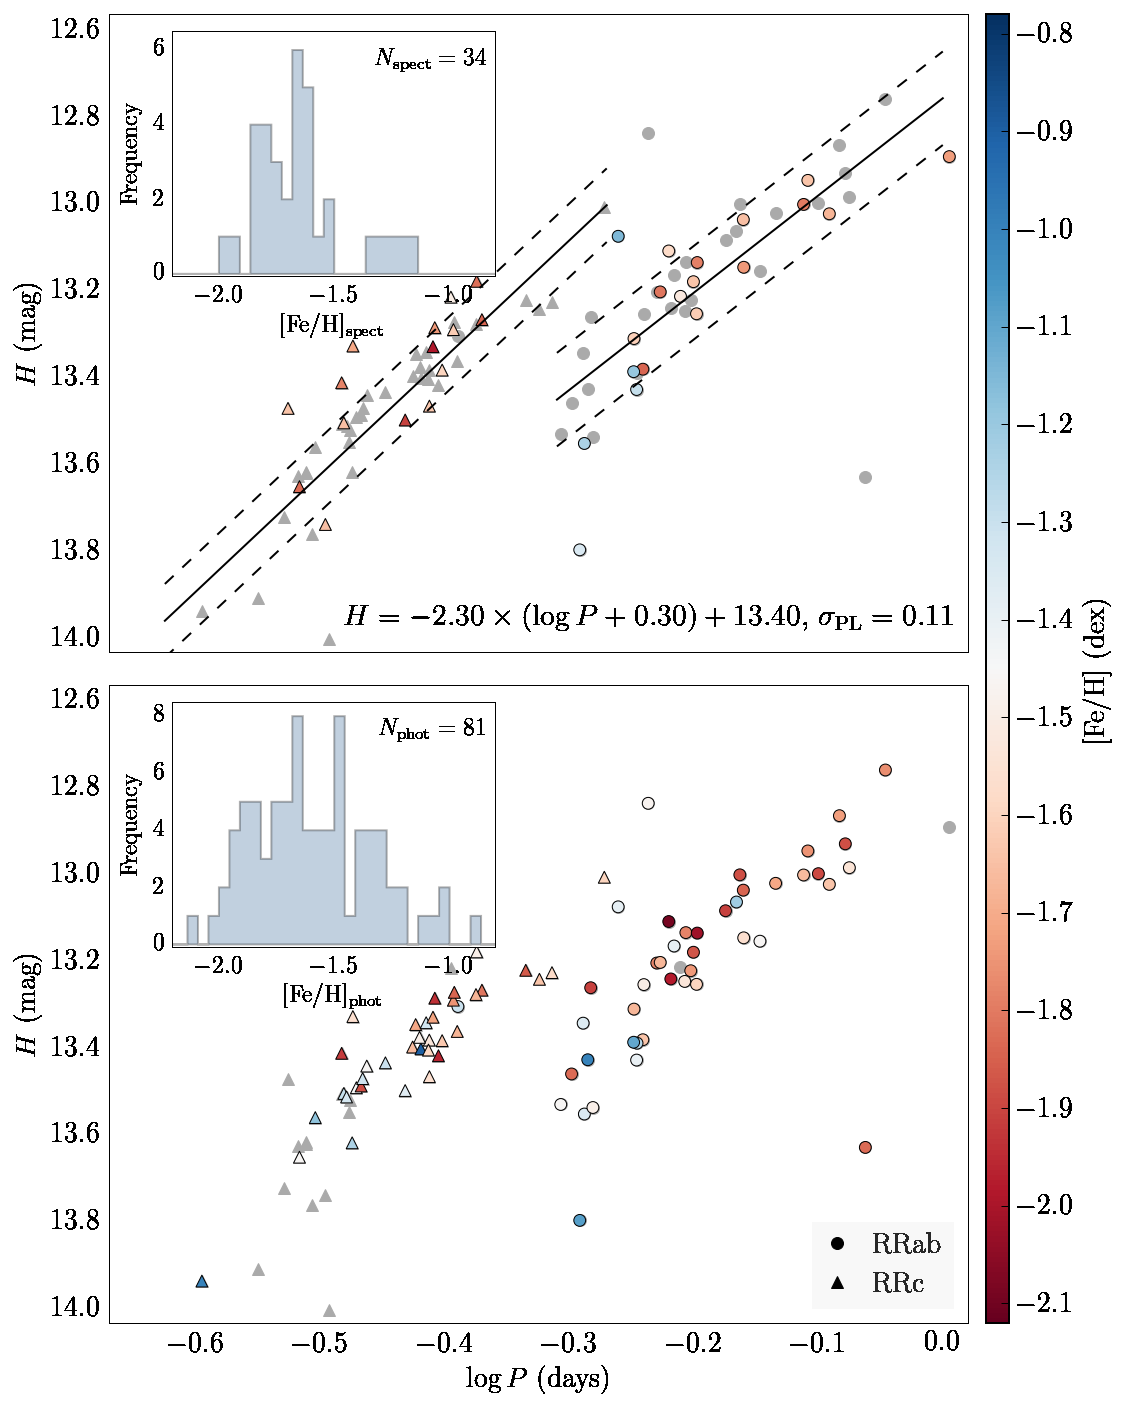

In [13]:
fig, (ax1, ax2) = plt.subplots(2,1,figsize=(8,10),sharex=True, sharey=True)
ppl.plot(ax1, df_ab.log_per, df_ab.mag_h, 'o', color='#AAAAAA', mec='#AAAAAA', zorder=-1)
ppl.plot(ax2, df_ab.log_per, df_ab.mag_h, 'o', color='#AAAAAA', mec='#AAAAAA', zorder=-1)
ppl.plot(ax1, df_c.log_per, df_c.mag_h, '^', color='#AAAAAA', mec='#AAAAAA', zorder=-1)
ppl.plot(ax2, df_c.log_per, df_c.mag_h, '^', color='#AAAAAA', mec='#AAAAAA', zorder=-1)
#x = np.linspace(-1,0.5,5)
#y = -2.3*(x + 0.3) + 13.4
for i in range(2):
    y = pls[i](x[i], dist[i])
    ax1.plot(x[i],y,'k-')
    ax1.plot(x[i],y+sig[i],'k--')
    ax1.plot(x[i],y-sig[i],'k--')
ax1.scatter(df_s_ab.log_per, df_s_ab.mag_h, c=df_s_ab.spectfeh, s=35, lw=0.5, cmap='RdBu')
ax1.scatter(df_s_c.log_per, df_s_c.mag_h, c=df_s_c.spectfeh, marker='^', s=35, lw=0.5, cmap='RdBu')
ax2.scatter(df_p_ab.log_per, df_p_ab.mag_h, c=df_p_ab.photfeh, s=35, lw=0.5, cmap='RdBu')
s2 = ax2.scatter(df_p_c.log_per, df_p_c.mag_h, c=df_p_c.photfeh, marker='^', s=35, lw=0.5, cmap='RdBu')
ax1.set_ylim(14.03,12.56)
ax1.set_xlim(-0.67,0.02)
ax1.set_ylabel('$H$ (mag)')
ax2.set_ylabel('$H$ (mag)')
ax2.set_xlabel('$\log P$ (days)')

fig.tight_layout()

pos2 = ax2.get_position()
pos1 = ax1.get_position()

minus_factor = 0.12

pos1.x1 -= minus_factor
pos2.x1 -= minus_factor

ax1.set_position(pos1)
ax2.set_position(pos2)

cax = fig.add_axes([0.99 - minus_factor, pos2.y0, 0.02, (pos1.y1 - pos2.y0)])
fig.colorbar(s1, ticks=np.linspace(-0.8,-2.1,14), cax=cax, label='[Fe/H] (dex)')

smfont = 12

ax3 = fig.add_axes([pos1.x0 + 0.055, pos1.y1 - 0.182, 0.28, 0.17])
ax4 = fig.add_axes([pos1.x0 + 0.055, pos2.y1 - 0.182, 0.28, 0.17])
ax3.set_xlim(-2.2,-0.8)
ax3.set_xticks(np.linspace(-1,-2,3))
ax3.set_ylim(-0.06,6.5)
ax3.set_yticks(np.linspace(0,6,4))
ax4.set_xlim(ax3.get_xlim())
ax4.set_xticks(ax3.get_xticks())
ax4.set_ylim(-0.08,8.5)
ax4.set_yticks(np.linspace(0,8,5))
ppl.plot(ax3, [], [])
ppl.plot(ax4, [], [])

ax3.tick_params(axis='both', which='major', labelsize=smfont)
ax4.tick_params(axis='both', which='major', labelsize=smfont)

spect = df_spect.spectfeh.values
spect = spect[(spect>-2.12) & (spect<-0.78)]
phot = df_phot.photfeh.values
phot = phot[(phot>-2.12) & (phot<-0.78)]
bins = np.linspace(phot.min() + 0.5*phot.min(),phot.max()-0.5*phot.max(),60)
ax3.hist(spect, bins=bins, histtype='stepfilled', color='#346598', alpha=0.3)
ax3.set_ylabel('Frequency', fontsize=smfont)
ax3.text(-0.83,6,'$N_\mathrm{spect}' + ' = {}$'.format(len(spect)), ha='right', va='top', fontsize=smfont)
ax3.set_xlabel('[Fe/H]$_\mathrm{spect}$', fontsize=smfont)
ax4.hist(phot, bins=bins, histtype='stepfilled', color='#346598', alpha=0.3)
ax4.set_ylabel('Frequency', fontsize=smfont)
ax4.text(-0.83,8.5*(6/6.5),'$N_\mathrm{phot}' + ' = {}$'.format(len(phot)), ha='right', va='top', fontsize=smfont)
ax4.set_xlabel('[Fe/H]$_\mathrm{phot}$', fontsize=smfont)

circ = ax2.plot([],[], 'ko', label='RRab')
tri = ax2.plot([],[], 'k^', label='RRc')

handles, labels = ax2.get_legend_handles_labels()

ppl.legend(ax2, handles=handles[2:4], labels=labels[2:4], loc='lower right', prop={'size':14},
           numpoints=1, handlelength=1)
ax1.text(0.01,13.99,r'$H = -2.30 \times (\log P + 0.30) + 13.40$'
         + ', ' + '$\sigma_\mathrm{PL} = 0.11$', ha='right', va='bottom', fontsize=15)

#fig.tight_layout()
# fig.savefig('final_plots/h_band_PL.pdf')